In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import gzip
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop
from keras.datasets import mnist

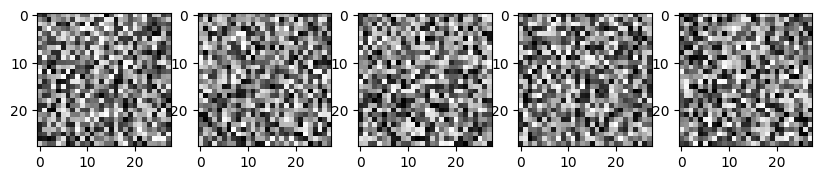

In [ ]:
inputs = np.random.rand(10000, 28, 28)
valid = np.random.rand(2000, 28, 28)
fig, ax = plt.subplots(1,5,figsize=(10, 10))
for i in range(5):
    ax[i].imshow(inputs[i], cmap='gray')
plt.show()

In [ ]:
input_img = Input(shape = (28, 28, 1))

In [ ]:
def autoencoder(input_img):
    #encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [ ]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = 'adam')

In [ ]:
inputs = inputs.reshape(-1, 28, 28, 1)
valid = valid.reshape(-1, 28, 28, 1)

In [ ]:
autoencoder_train = autoencoder.fit(inputs, inputs, batch_size=32,epochs=50,verbose=1,validation_data=(valid, valid))

Epoch 1/50
313/313 [==============================] - 4s 7ms/step - loss: 0.0695 - val_loss: 0.0585
Epoch 2/50
313/313 [==============================] - 2s 5ms/step - loss: 0.0529 - val_loss: 0.0492
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 0.0470 - val_loss: 0.0455
Epoch 4/50
313/313 [==============================] - 2s 6ms/step - loss: 0.0438 - val_loss: 0.0429
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 0.0419 - val_loss: 0.0411
Epoch 6/50
313/313 [==============================] - 2s 6ms/step - loss: 0.0405 - val_loss: 0.0401
Epoch 7/50
313/313 [==============================] - 2s 5ms/step - loss: 0.0394 - val_loss: 0.0401
Epoch 8/50
313/313 [==============================] - 2s 6ms/step - loss: 0.0386 - val_loss: 0.0386
Epoch 9/50
313/313 [==============================] - 2s 6ms/step - loss: 0.0379 - val_loss: 0.0378
Epoch 10/50
313/313 [==============================] - 2s 5ms/step - loss: 0.0372 - val_loss: 0.0371

In [ ]:
test_inputs = np.random.rand(50, 28, 28)
test_inputs = test_inputs.reshape(-1, 28, 28, 1)

In [ ]:
pred = autoencoder.predict(test_inputs)
autoencoder.evaluate(test_inputs, test_inputs)

2/2 [==============================] - 0s 6ms/step - loss: 0.0225


0.022463560104370117

Test Images


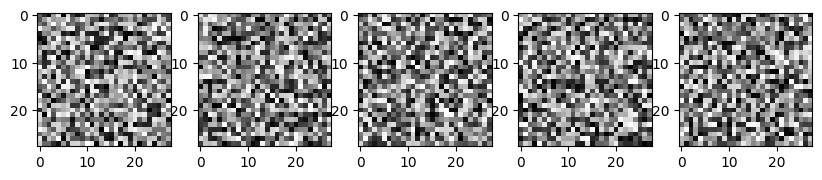

In [ ]:
print("Test Images")
fig, ax = plt.subplots(1,5,figsize=(10,10))
for i in range(5):
    ax[i].imshow(test_inputs[i], cmap='gray')

Reconstructed Images


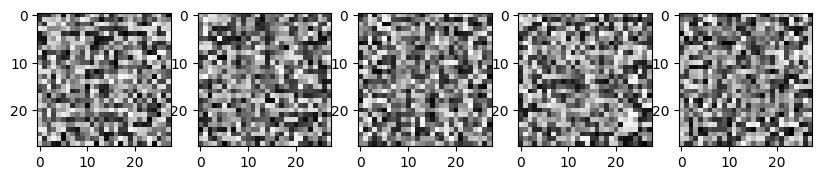

In [ ]:
print("Reconstructed Images")
fig, ax = plt.subplots(1,5,figsize=(10,10))
for i in range(5):
    ax[i].imshow(pred[i], cmap='gray')
plt.show()

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()

In [ ]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [ ]:
input_img = Input(shape = (28, 28, 1))

def autoencoder(input_img):
    #encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [ ]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='binary_crossentropy', optimizer = 'adam')

In [ ]:
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/10
469/469 [==============================] - 8s 14ms/step - loss: 0.0975 - val_loss: 0.0714
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0701 - val_loss: 0.0680
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0679 - val_loss: 0.0666
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0667 - val_loss: 0.0660
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0659 - val_loss: 0.0651
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0654 - val_loss: 0.0646
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0649 - val_loss: 0.0645
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0646 - val_loss: 0.0640
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0642 - val_loss: 0.0636
Epoch 10/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0639 - val_lo

In [ ]:
pred = autoencoder.predict(X_test)
autoencoder.evaluate(X_test, X_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0634


0.0633581280708313

Test Images


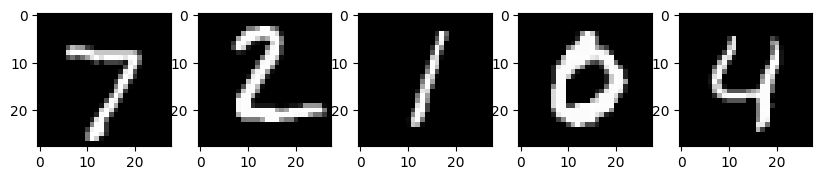

In [ ]:
print("Test Images")
fig, ax = plt.subplots(1,5,figsize=(10,10))
for i in range(5):
    ax[i].imshow(X_test[i], cmap='gray')

Reconstructed Images


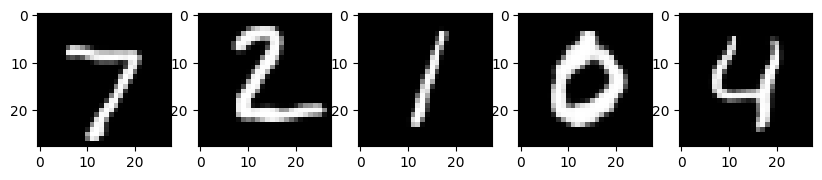

In [ ]:
print("Reconstructed Images")
fig, ax = plt.subplots(1,5,figsize=(10,10))
for i in range(5):
    ax[i].imshow(pred[i], cmap='gray')

https://keras.io/examples/vision/autoencoder/

https://blog.keras.io/building-autoencoders-in-keras.html

https://keras.io/examples/timeseries/timeseries_anomaly_detection/